# Part II - Factors Increasing House Rent In India
## by Ben Goodness

## Investigation Overview


In this investigation, I wanted to look at the variables of dataset that ccontributes to increased rent. The main focus was on the size, bhk and city.



## Dataset Overview

In this Dataset, we have information on 4746 Houses/Apartments/Flats Available for Rent with 9 different parameters like bhk, rent, size, area_type, city, furnishing_status, type of tenant_preferred, No. of bathrooms, point_of_Contact. Outliers were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
house_rent = pd.read_csv('House_Rent_Dataset.csv', usecols = ['BHK','Rent', 'Size', 'Area Type', 'City',
                                                        'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact'])

In [3]:
# convert all columns name to lower case
house_rent.columns = house_rent.columns.str.lower()
house_rent.columns

# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'bhk': [1, 2, 3, 4, 5, 6],
                    'bathroom': [1, 2, 3, 4, 5, 6]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    house_rent[var] = house_rent[var].astype(ordered_var)    

In [4]:
# remove spaces in columns name
house_rent.columns = house_rent.columns.str.replace(" ", "_")

In [5]:
# data wrangling, removing outliers with inconsistent data.
# identifying outliers
house_rent[house_rent['rent'] > 67500]
outliers = house_rent[house_rent['rent'] > 67500].index

# drop the outliers
house_rent.drop(outliers, inplace=True)

## Distribution of House Rent

House Rent in the dataset take on a very large range of values, from about  1000 𝑎𝑡 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜 𝑎𝑏𝑜𝑢𝑡 70,000 at the highest. Plotted on a logarithmic scale, the distribution of house prices takes on a bell shape.


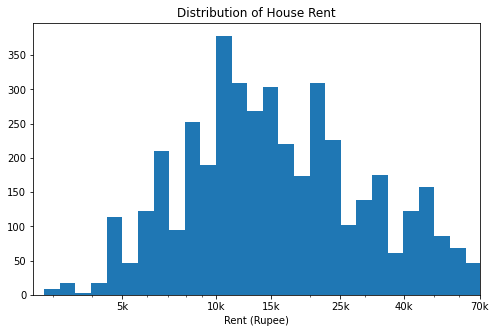

In [6]:
# plotting rent on a standard scale
log_binsize = 0.05
#bins = np.arange(0, house_rent['rent'].max()+binsize, binsize)
bins = 10 ** np.arange(2.4, np.log10(house_rent['rent'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = house_rent, x = 'rent', bins = bins)
plt.xscale('log')
plt.xlim([2600, 7e4])
plt.xticks([5e3, 1e4, 1.5e4, 2.5e4, 4e4, 7e4], ['5k', '10k', '15k', '25k', '40k', '70k'])
plt.title('Distribution of House Rent')
plt.xlabel('Rent (Rupee)')
plt.show()

## Distribution of House Sizes

The house sizes are measured in square feet. size appears to be right skewed. Majority of the data are located at the low size range, with a steady decline after its peak 500 sqft.

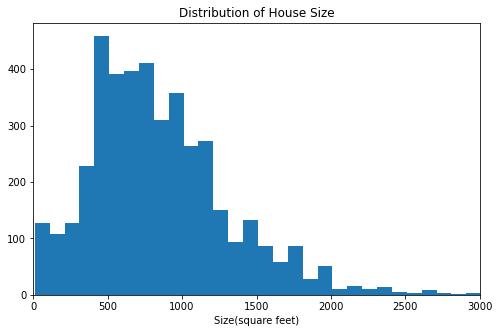

In [7]:
binsize = 100
bins = np.arange(10, house_rent['size'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = house_rent, x = 'size', bins = bins)
plt.title('Distribution of House Size')
plt.xlabel('Size(square feet)')
# Set the upper and lower bounds of the bins that are displayed in the plot
plt.xlim((0,3000));
plt.show()

## House rent vs Size

The relationship between house rent to house size appears positive, the higher values of the size, the more the rent increases.
The dark area of the graph indicates a higher volume of number of houses, the distribution appears to be below rent of 20000 and size 1500. Interestingly, some points have increased rent without increase in size.

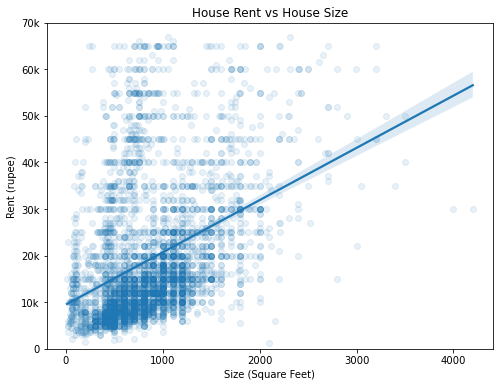

In [8]:
# a regplot of rent and size
plt.figure(figsize = [8, 6])

sb.regplot(data = house_rent, x = 'size', y = 'rent', scatter_kws={'alpha':1/10});
plt.title('House Rent vs House Size')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Rent (rupee)')
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4], ['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k'])
plt.ylim((0,70000));

## House rent and House size by bhk and bathroom.

There is an interaction effect visible between Rent, House size, and the categorical measures of quality: bhk and bathroom, as rent and size increases, bhk and bathroom also increase in an orderly sequence. Both variables are identical because the number of bhk ddetermines the number of bathroom. Thus this leads to the size of the house, the more the bhk/bathroom the more the house size.

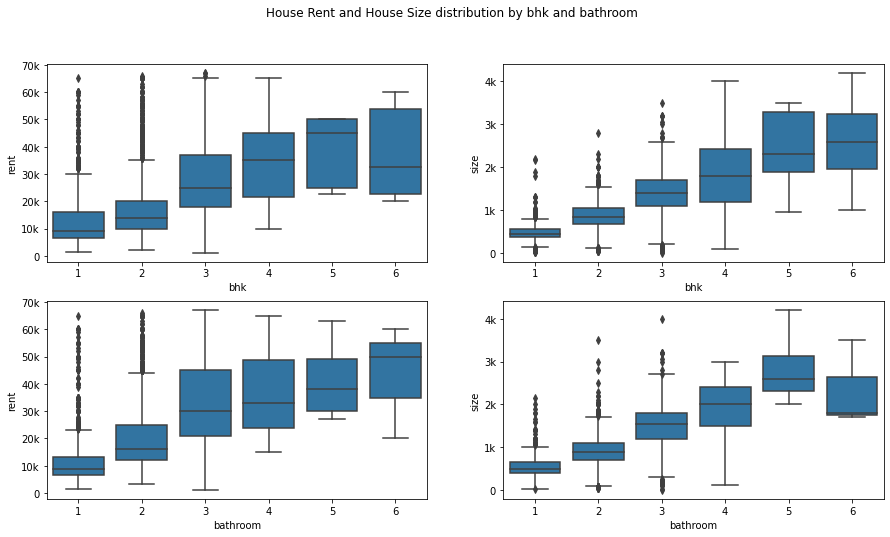

In [9]:
base_color = sb.color_palette()[0]

fig, ax = plt.subplots(ncols = 2, nrows=2, figsize = [15,8])

ax1 = sb.boxplot(data=house_rent, x='bhk', y='rent', color=base_color, ax = ax[0,0]);
ax[0,0].set_yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4])
ax[0,0].set_yticklabels(['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k'])

ax1 = sb.boxplot(data=house_rent, x='bhk', y='size', color=base_color, ax = ax[0,1]);
ax[0,1].set_yticks([0, 1e3, 2e3, 3e3, 4e3])
ax[0,1].set_yticklabels(['0', '1k', '2k', '3k', '4k'])

ax1 = sb.boxplot(data=house_rent, x='bathroom', y='rent', color=base_color, ax = ax[1,0]);
ax[1,0].set_yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4])
ax[1,0].set_yticklabels(['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k'])

ax1 = sb.boxplot(data=house_rent, x='bathroom', y='size', color=base_color, ax = ax[1,1]);
ax[1,1].set_yticks([0, 1e3, 2e3, 3e3, 4e3])
ax[1,1].set_yticklabels(['0', '1k', '2k', '3k', '4k'])

fig.suptitle('House Rent and House Size distribution by bhk and bathroom');

## House rent and House size by City.

The interactions city had with rent and size is interesting,  cities like Kolkata, Bangalore, Delhi, Chennai and Hyderabad all had a linear increase in rent except for Mumbai which has a non-linear increase of rent. Houses size in Mumbai ranges around 100 - 1500 square feet and house rent ranges around 2000 - 65000 rupees. This explains the reason behind the non-linear increase of house rent noticed earlier in the **house rent vs house size** graph.

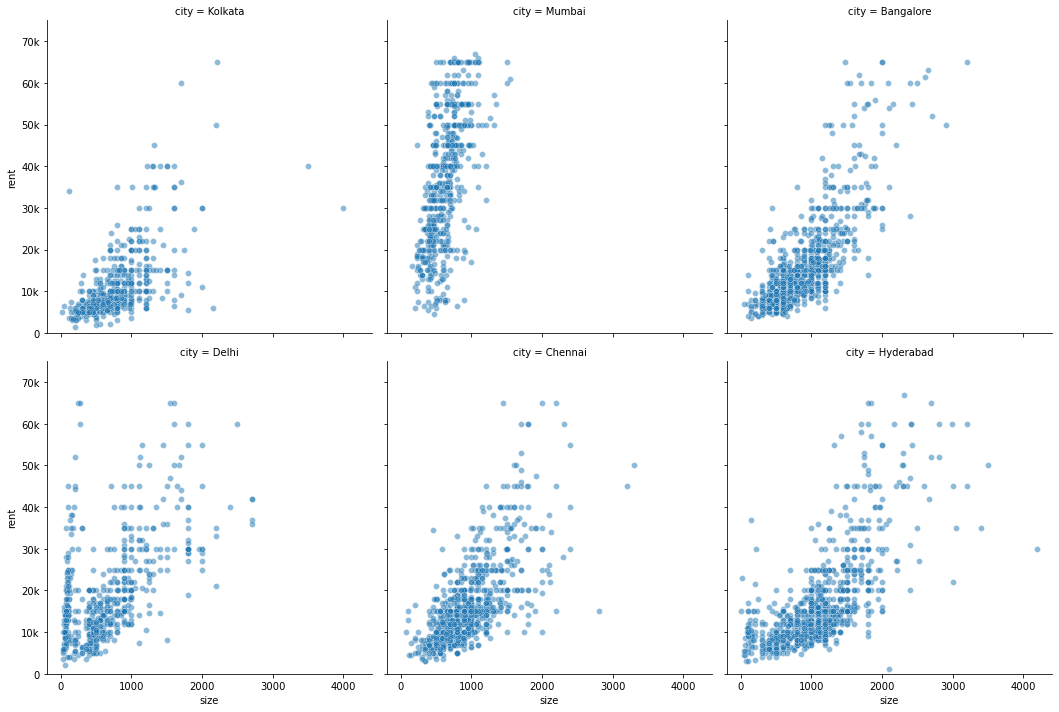

In [10]:
# Plot a relplot of city.
sb.relplot(x='size', y='rent', col='city',
          alpha=.5, palette='muted', data= house_rent, col_wrap=3);
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4], ['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k']);
plt.ylim((0,75000));

## House rent by City for Selected Norminal variables (area Typye & Point of Contact)

We used both area type and point of contact. This is most evident for the City measure.
The point plot of rent with city against area type and point of contact shows an interesting feature. Here we can clearly identify the features of both norminal variables that corresponds with rent increase inline with various cities.<br>
Carpet area type has its highest rent around 40,000 rupees and this occurs for houses only in Mumbai. Also, contact agent turns out to be the highest in house rent, with its highest around 40,000 occurred in Mumbai.
Most houses in Mumbai are built in carpet area and point of contact are by agents. House rent in Mumbai increases regardless of the sizes of the house.
These features are the secondary causes of house rent increase, which a high number of them occurred in Mumbai.

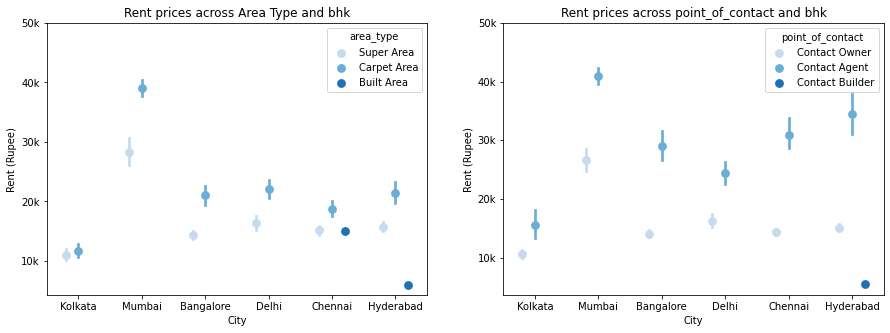

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,5])

sb.pointplot(data = house_rent, x = 'city', y = 'rent', hue = 'area_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_yticks([1e4, 2e4, 3e4, 4e4, 5e4])
ax[0].set_yticklabels(['10k', '20k', '30k', '40k', '50k'])
ax[0].set_title('Rent prices across Area Type and bhk')
ax[0].set_xlabel("City");
ax[0].set_ylabel("Rent (Rupee)");

sb.pointplot(data = house_rent, x = 'city', y = 'rent', hue = 'point_of_contact',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_yticks([1e4, 2e4, 3e4, 4e4, 5e4])
ax[1].set_yticklabels(['10k', '20k', '30k', '40k', '50k'])
ax[1].set_title('Rent prices across point_of_contact and bhk')
ax[1].set_ylabel("Rent (Rupee)")
ax[1].set_xlabel("City");

In [ ]:
!jupyter nbconvert Part_II_House_Rent_Prediction.ipynb --to slides --post serve --no-input --no-prompt